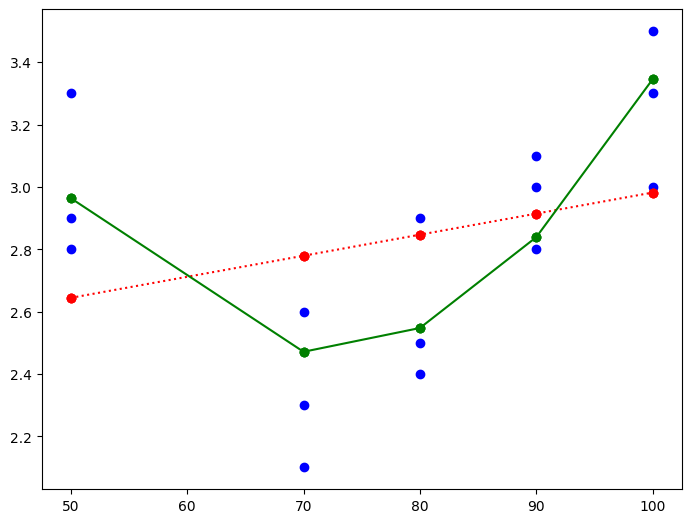

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('temperature.csv')
x = df['temp'].to_numpy()
y = df['yield'].to_numpy()
xb, yb = x.mean(), y.mean()
a, b = 0, 0
for i in range(len(x)):
    a += (x[i] - xb) * (y[i] - yb)
    b += (x[i] - xb) ** 2
b0 = a / b
b1 = yb - (b0 * xb)
slr_predict = []
for i in range(len(x)):
    slr_predict.append((b0 * x[i]) + b1)
slr_predict = np.array(slr_predict)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.scatter(x, y, color= 'blue')
plt.plot(x, slr_predict, linestyle= ':', color= 'red')
plt.scatter(x, slr_predict, color= 'red')
a, b, c, d, e, f, g, h = len(x), x.sum(), 0, 0, 0, y.sum(), 0, 0
for i in range(len(x)):
    c += x[i] ** 2
    d += x[i] ** 3
    e += x[i] ** 4
    g += x[i] * y[i]
    h += (x[i] ** 2) * y[i]
A = np.array([a, b, c, b, c, d, c, d, e]).reshape((3,3))
B = np.array([f, g, h]).reshape((3, 1))
C = np.linalg.inv(A)
ans = C.dot(B)
pr_predict = []
for i in range(len(x)):
    pr_predict.append(ans[0] + (ans[1] * x[i]) + (ans[2] * (x[i] ** 2)))
pr_predict = np.array(pr_predict)
plt.plot(x, pr_predict, color = 'green')
plt.scatter(x, pr_predict, color= 'green')
# mse and rmse can be calculated using the formula

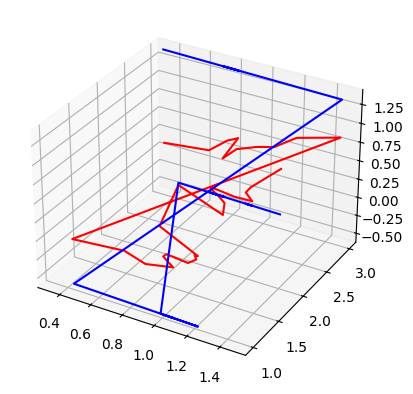

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('data.csv')
x1 = df['Area']
x2 = df['Group']
y = df['Infarc']
a, b = 0, 0
for i in range(len(y)):
    a += (((x2[i] ** 2) * (x1[i] * y[i])) - ((x1[i] * x2[i]) * (x2[i] * y[i])))
    b += (((x1[i] ** 2) * (x2[i] ** 2)) - ((x1[i] * x2[i]) ** 2))
b1 = a / b
a, b = 0, 0
for i in range(len(y)):
    a += ((x1[i] ** 2) * (x2[i] * y[i])) - ((x1[i] * x2[i]) * (x1[i] * y[i]))
    b += ((x1[i] ** 2) * (x2[i] ** 2)) - ((x1[i] * x2[i]) ** 2)
b2 = a / b
b0 = y.mean() - (b1 * x1.mean()) - (b2 * x2.mean())
predict = []
for i in range(len(y)):
    predict.append(b0 + (b1 * x1[i]) + (b2 * (x2[i])))
predict = np.array(predict)
fig = plt.figure()
ax = fig.add_subplot(111, projection= '3d')
plt.plot(x1, x2, y, color = 'red')
plt.plot(x1, x2, predict, color= 'blue')